In [1]:
from pathlib import Path

from matflow import load_workflow

import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage
from matplotlib import gridspec
from PIL import Image

%matplotlib inline

# Load workflow

In [2]:
# load in x model 100%
workflow_100 = load_workflow('C:/Users/mbgm5pc3/Dropbox (The University of Manchester)/matflow_exports/RVE_extrusion_worked/RVE_extrusion_2021-06-15-101208')
#workflow = load_workflow('D:/Matflow_exports/RVE_extrusion_2021-06-15-101208')

sim_task_100 = workflow_100.tasks.simulate_volume_element_loading
vol_elem_resp_100 = sim_task_100.elements[0].outputs.volume_element_response

# load in x smaller model 75%
workflow_75 = load_workflow('C:/Users/mbgm5pc3/Dropbox (The University of Manchester)/matflow_exports/RVE_extrusion_worked/RVE_extrusion_2021-06-17-132749')

sim_task_75 = workflow_75.tasks.simulate_volume_element_loading
vol_elem_resp_75 = sim_task_75.elements[0].outputs.volume_element_response

# load in x smaller model 50%
workflow_50 = load_workflow('C:/Users/mbgm5pc3/Dropbox (The University of Manchester)/matflow_exports/RVE_extrusion_worked/RVE_extrusion_2021-06-17-144358')

sim_task_50 = workflow_50.tasks.simulate_volume_element_loading
vol_elem_resp_50 = sim_task_50.elements[0].outputs.volume_element_response

Loading matflow config from C:\Users\mbgm5pc3\.matflow\config.yml
Loading task schemas from 1 file(s)...OK!
Loading software definitions from 1 file(s)...OK!


In [3]:
workflow_100.tasks

(Task(name='load_microstructure', method='EBSD', software='defdap'), Task(name='generate_volume_element', method='extrusion', software='damask'), Task(name='modify_volume_element', method='add_buffer_zones', software='damask'), Task(name='visualise_volume_element', method='VTK', software='damask'), Task(name='generate_load_case', method='uniaxial', software='formable'), Task(name='simulate_volume_element_loading', method='CP_FFT', software='damask'))

# Plot stress strain curve

In [4]:
mean_strain_100 = vol_elem_resp_100['phase_data']['vol_avg_strain']['data']
mean_stress_100 = vol_elem_resp_100['phase_data']['vol_avg_stress']['data']

mean_strain_75 = vol_elem_resp_75['phase_data']['vol_avg_strain']['data']
mean_stress_75 = vol_elem_resp_75['phase_data']['vol_avg_stress']['data']

mean_strain_50 = vol_elem_resp_50['phase_data']['vol_avg_strain']['data']
mean_stress_50 = vol_elem_resp_50['phase_data']['vol_avg_stress']['data']

(0.0, 490.77134238524195)

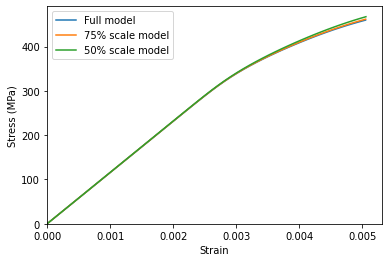

In [5]:
plt.figure()
plt.plot(mean_strain_100[:, 0, 0], mean_stress_100[:, 0, 0]/1e6,label = "Full model")
plt.plot(mean_strain_75[:, 0, 0], mean_stress_75[:, 0, 0]/1e6,label = "75% scale model")
plt.plot(mean_strain_50[:, 0, 0], mean_stress_50[:, 0, 0]/1e6,label = "50% scale model")

# show legend
plt.legend()

plt.xlabel('Strain')
plt.ylabel('Stress (MPa)')
plt.xlim([0, None])
plt.ylim([0, None])

#plt.savefig(r'stress_strain_curve_comparison.png')

# Plot stress map

In [6]:
stress = vol_elem_resp['field_data']['sigma']
print(stress['meta']['increments'])

stress = stress['data']
print(stress.shape)

[10, 20, 30, 40, 50]
(5, 1246, 836, 10, 3, 3)


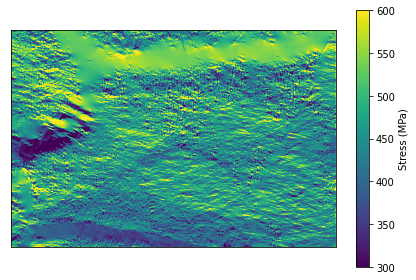

In [9]:
inc = 4
z_layer = 2
tensor_comp = (0, 0)
buff_size_xy = (4, 4)

map_slice = (
    inc, 
    slice(buff_size_xy[0], -buff_size_xy[0]), 
    slice(buff_size_xy[1], -buff_size_xy[1]), 
    z_layer
) + tensor_comp

plt.figure()
plt.imshow(stress[map_slice].T*1e-6,vmin=300,vmax=600)
plt.colorbar(label='Stress (MPa)')
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.savefig(r'stress.png')

# Plot strain map

In [12]:
strain = vol_elem_resp['field_data']['epsilon_U^2(F)']
print(strain['meta']['increments'])
strain = strain['data']
print(strain.shape)

[10, 20, 30, 40, 50]
(5, 1246, 836, 10, 3, 3)


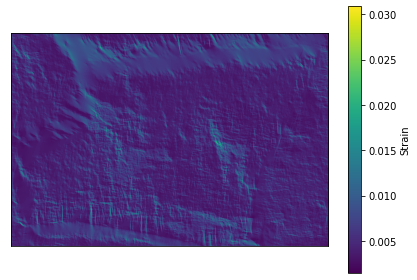

In [14]:

inc = 4
z_layer = 2
tensor_comp = (0, 0)
buff_size_xy = (4, 4)

map_slice = (
    inc, 
    slice(buff_size_xy[0], -buff_size_xy[0]), 
    slice(buff_size_xy[1], -buff_size_xy[1]), 
    z_layer
) + tensor_comp

plt.figure()
plt.imshow(rotated_strain[map_slice].T)
plt.colorbar(label='Strain')
plt.xticks([])
plt.yticks([])

plt.tight_layout()
#plt.savefig(r'strain.png')

# Plot plastic strain map

In [6]:
plastic_strain_100 = vol_elem_resp_100['field_data']['epsilon_U^2(F_p)']
print(plastic_strain_100['meta']['increments'])
plastic_strain_100 = plastic_strain_100['data']

plastic_strain_75 = vol_elem_resp_75['field_data']['epsilon_U^2(F_p)']
print(plastic_strain_75['meta']['increments'])
plastic_strain_75 = plastic_strain_75['data']

plastic_strain_50 = vol_elem_resp_50['field_data']['epsilon_U^2(F_p)']
print(plastic_strain_50['meta']['increments'])
plastic_strain_50 = plastic_strain_50['data']

[10, 20, 30, 40, 50]
[10, 20, 30, 40, 50]
[10, 20, 30, 40, 50]


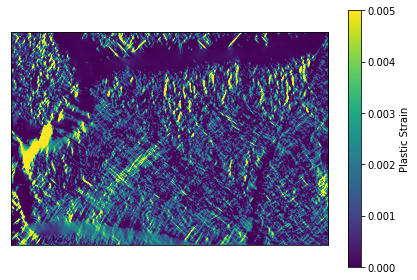

In [7]:
inc = 4
z_layer = 2
tensor_comp = (0, 0)
buff_size_xy = (4, 4)

map_slice = (
    inc, 
    slice(buff_size_xy[0], -buff_size_xy[0]), 
    slice(buff_size_xy[1], -buff_size_xy[1]), 
    z_layer
) + tensor_comp


plt.figure()
plt.imshow(plastic_strain_100[map_slice].T,vmin=0,vmax=0.005)
plt.colorbar(label='Plastic Strain')
plt.xticks([])
plt.yticks([])

plt.tight_layout()
#plt.savefig(r'plastic_strain_hard.png')

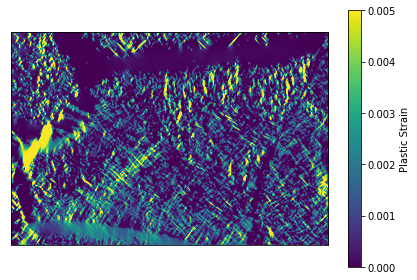

In [8]:
plt.figure()
plt.imshow(plastic_strain_75[map_slice].T,vmin=0,vmax=0.005)
plt.colorbar(label='Plastic Strain')
plt.xticks([])
plt.yticks([])

plt.tight_layout()

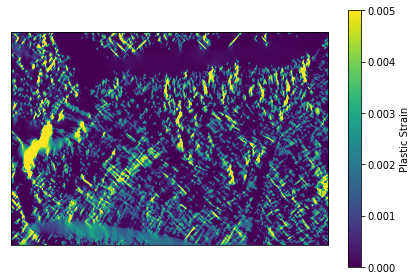

In [9]:
plt.figure()
plt.imshow(plastic_strain_50[map_slice].T,vmin=0,vmax=0.005)
plt.colorbar(label='Plastic Strain')
plt.xticks([])
plt.yticks([])

plt.tight_layout()

In [10]:
def plot_profile(def_map,start_point,end_point):
    x0, y0  = start_point[0], start_point[1] # These are in _pixel_ coordinates!!
    x1, y1 = end_point[0], end_point[1]
    profile_length=np.sqrt((y1-y0)**2+(x1-x0)**2)
    num = np.round(int(profile_length))
    x, y = np.linspace(x0, x1, num), np.linspace(y0, y1, num)

    # Extract the values along the line, using cubic interpolation
    zi = scipy.ndimage.map_coordinates(np.transpose(def_map), np.vstack((x,y)))*100
    plt.figure(figsize=(10,3))
    gs = gridspec.GridSpec(1, 2, height_ratios=[1]) 
    ax0=plt.subplot(gs[0])
    ax1=plt.subplot(gs[1])
    ax0.imshow(def_map,vmin=-0.00,vmax=0.005,interpolation='bilinear',cmap='viridis');
    ax0.plot([x0, x1], [y0, y1], 'rx-',lw=2);
    ax0.axis('image');
    ax0.set_xlabel('X-position (pixels)')
    ax0.set_ylabel('Y-position (pixels)')
   
    
    ax1.plot(zi)
    ax1.axis()
    ax1.set_xlabel('X-position (pixels)')
    ax1.set_ylabel('Plastic strain (%)')
    ax1.set_ylim([-0.2, 1.6])

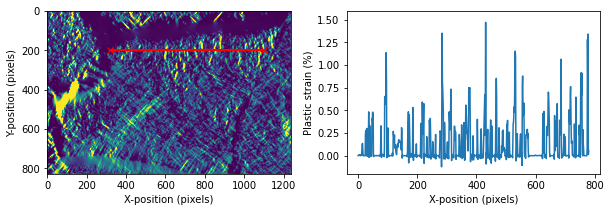

In [17]:
plot_profile(plastic_strain_100[map_slice].T,[320,200],[1100,200])


#plt.savefig(r'mesh convergence 100.png')

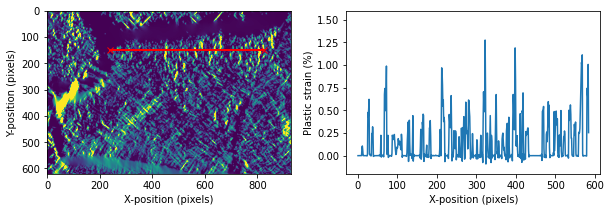

In [18]:
plot_profile(plastic_strain_75[map_slice].T,[240,150],[825,150])

#plt.savefig(r'mesh convergence 75.png')

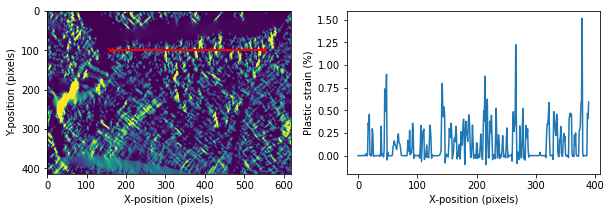

In [19]:
plot_profile(plastic_strain_50[map_slice].T,[160,100],[550,100])

#plt.savefig(r'mesh convergence 50.png')